# <center>Face spoofing Detection (CNN) </center>

Face spoofing detection systems are used to secure biometric authentication systems. The proposed solution uses <b>CNN</b>, a Deep learning Network to find whether the face is spoofed or not.
<img src="./Resources/facespoof.png">

## Image Argumentation

Here we are loading the dataset using <b>ImageDataGenerator.flow_from_directory</b> function. Our dataset is not that big. It contains the follwing images:
    
    train images = 961 images in total (contains 2 classes)
        Face_Images = 299 images
        Mobile_Images = 662 images
    
    test images = 396 images in total (contains 2 classes)
        Face_Images = 120 images
        Mobile_Images = 276 images
        
        
By the dataset we can say that our dataset is not that balanced. But this was the dataset that was available. But our Model is still predicting well after conducting tests.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, vertical_flip=False)

In [3]:
test_datagen = ImageDataGenerator(rescale=1/255)

In [4]:
x_train = train_datagen.flow_from_directory('./data/data_train', target_size=(100,100), color_mode='grayscale',
                                           class_mode='categorical', batch_size=10)

Found 961 images belonging to 2 classes.


In [5]:
x_train.class_indices

{'Face_Images': 0, 'Mobile_Images': 1}

In [6]:
x_test = train_datagen.flow_from_directory('./data/data_test', target_size=(100,100), color_mode='grayscale',
                                           class_mode='categorical', batch_size=10)

Found 396 images belonging to 2 classes.


In [7]:
x_test.class_indices

{'Face_Images': 0, 'Mobile_Images': 1}

In [8]:
STEP_SIZE_TRAIN = x_train.n // x_train.batch_size
STEP_SIZE_TRAIN

96

In [9]:
STEP_SIZE_TEST = x_test.n // x_test.batch_size
STEP_SIZE_TEST

39

## Creating the Model

We are going to create a CNN Model with the following <b>architecture</b> :

    - Two Convolution Layer with Average Pooling and relu activation applied
    - Then, Flattening to use it as the input to ANN
    - First hidden Layer with 120 neurons and relu activation function applied
    - Second hidden Layer with 84 neurons and relu activation function applied
    - Output Layer with 2 output units as we have 2 classes and sigmoid activation function applied

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, AveragePooling2D, Flatten, Dense

In [11]:
model = Sequential()

## First convolution Layer
model.add(Convolution2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(100,100,1)))
model.add(AveragePooling2D())

## Second Convolution layer
model.add(Convolution2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())

## Flattening
model.add(Flatten())

## First Hidden Layer
model.add(Dense(units=120, activation='relu'))

## Second Hidden Layer
model.add(Dense(units=84, activation='relu'))

## Output Layer
model.add(Dense(units=2, activation = 'sigmoid'))

## Compiling the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Fitting the Model
model.fit_generator(generator=x_train,steps_per_epoch=STEP_SIZE_TRAIN, validation_data = x_test, validation_steps=STEP_SIZE_TEST,epochs=20)

Epoch 1/20


C:\Users\sanja\AppData\Local\Temp/ipykernel_22120/1264919445.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=x_train,steps_per_epoch=STEP_SIZE_TRAIN, validation_data = x_test, validation_steps=STEP_SIZE_TEST,epochs=20)


96/96 [==============================] - 10s 100ms/step - loss: 0.6303 - accuracy: 0.7024 - val_loss: 0.5808 - val_accuracy: 0.7051
Epoch 2/20
96/96 [==============================] - 9s 99ms/step - loss: 0.4699 - accuracy: 0.7655 - val_loss: 0.3426 - val_accuracy: 0.8538
Epoch 3/20
96/96 [==============================] - 9s 98ms/step - loss: 0.2543 - accuracy: 0.9033 - val_loss: 0.3087 - val_accuracy: 0.8692
Epoch 4/20
96/96 [==============================] - 9s 96ms/step - loss: 0.1643 - accuracy: 0.9464 - val_loss: 0.2044 - val_accuracy: 0.9308
Epoch 5/20
96/96 [==============================] - 9s 96ms/step - loss: 0.1338 - accuracy: 0.9516 - val_loss: 0.1683 - val_accuracy: 0.9462
Epoch 6/20
96/96 [==============================] - 9s 98ms/step - loss: 0.1248 - accuracy: 0.9590 - val_loss: 0.2051 - val_accuracy: 0.9282
Epoch 7/20
96/96 [==============================] - 9s 97ms/step - loss: 0.1024 - accuracy: 0.9674 - val_loss: 0.2476 - val_accuracy: 0.9103
Epoch 8/20
96/96 [====

## Model Summary

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 6)         60        
                                                                 
 average_pooling2d (AverageP  (None, 49, 49, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 16)        880       
                                                                 
 average_pooling2d_1 (Averag  (None, 23, 23, 16)       0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 8464)              0         
                                                                 
 dense (Dense)               (None, 120)               1

## Saving the Model

In [12]:
model.save('fsd.h5')

## Testing the Model

### 1.Testing Using a Image

#### 1st prediction

In [66]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

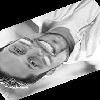

In [58]:
img = image.load_img('./data/data_test/Face_images/32a9849f-9e54-41e6-91bc-dbc011a6b9c6.jpg',color_mode='grayscale',target_size=(100,100))
img

In [20]:
model = load_model('fsd.h5')

In [59]:
x = image.img_to_array(img)
x

array([[[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 3.],
        [ 4.],
        [ 1.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 2.],
        [ 0.],
        [ 5.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 1.],
        [ 8.],
        [ 8.]],

       ...,

       [[11.],
        [ 4.],
        [ 1.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[20.],
        [ 0.],
        [16.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]],

       [[ 0.],
        [ 0.],
        [ 0.],
        ...,
        [ 0.],
        [ 0.],
        [ 0.]]], dtype=float32)

In [60]:
x.ndim

3

In [61]:
x = np.expand_dims(x,axis=0)
x

array([[[[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 3.],
         [ 4.],
         [ 1.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 2.],
         [ 0.],
         [ 5.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 1.],
         [ 8.],
         [ 8.]],

        ...,

        [[11.],
         [ 4.],
         [ 1.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[20.],
         [ 0.],
         [16.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        [[ 0.],
         [ 0.],
         [ 0.],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]]]], dtype=float32)

In [62]:
x.ndim

4

In [63]:
pred = np.argmax(model.predict(x),axis=1)
pred

array([0], dtype=int64)

In [64]:
index = ['Face_Images', 'Mobile_Images']

In [65]:
index[pred[0]]

'Face_Images'

#### 2nd prediction

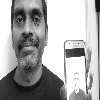

In [83]:
img = image.load_img('./data/data_test/Mobile_images/5b1ef249-8183-4f4d-807e-73daa51a8434.jpg',color_mode='grayscale',target_size=(100,100))
img

In [84]:
x = image.img_to_array(img)
x

array([[[255.],
        [255.],
        [255.],
        ...,
        [ 22.],
        [ 17.],
        [ 17.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [ 21.],
        [ 21.],
        [ 25.]],

       [[255.],
        [255.],
        [255.],
        ...,
        [ 22.],
        [ 24.],
        [ 25.]],

       ...,

       [[ 50.],
        [ 54.],
        [ 45.],
        ...,
        [212.],
        [206.],
        [ 50.]],

       [[ 49.],
        [ 50.],
        [ 47.],
        ...,
        [210.],
        [208.],
        [ 49.]],

       [[ 45.],
        [ 45.],
        [ 45.],
        ...,
        [209.],
        [209.],
        [ 45.]]], dtype=float32)

In [85]:
x.ndim

3

In [86]:
x = np.expand_dims(x,axis=0)
x

array([[[[255.],
         [255.],
         [255.],
         ...,
         [ 22.],
         [ 17.],
         [ 17.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [ 21.],
         [ 21.],
         [ 25.]],

        [[255.],
         [255.],
         [255.],
         ...,
         [ 22.],
         [ 24.],
         [ 25.]],

        ...,

        [[ 50.],
         [ 54.],
         [ 45.],
         ...,
         [212.],
         [206.],
         [ 50.]],

        [[ 49.],
         [ 50.],
         [ 47.],
         ...,
         [210.],
         [208.],
         [ 49.]],

        [[ 45.],
         [ 45.],
         [ 45.],
         ...,
         [209.],
         [209.],
         [ 45.]]]], dtype=float32)

In [87]:
x.ndim

4

In [88]:
pred = np.argmax(model.predict(x),axis=1)
pred

array([1], dtype=int64)

In [89]:
index = ['Face_Images', 'Mobile_Images']

In [90]:
index[pred[0]]

'Mobile_Images'

### 2. Testing using Webcam

In [93]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model('fsd.h5')
video = cv2.VideoCapture(0)
index = ['Face_Images', 'Mobile_Images']
while 1:
    succes, frame = video.read()
    cv2.imwrite('image.jpg',frame)
    img = image.load_img('image.jpg', color_mode='grayscale', target_size=(100,100))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=1)
    y = pred[0]
    cv2.putText(frame, 'The Image is: ' + str(index[y]), (100,100), cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),4) 
    ## img,text,startPT,fontstyle,scale(size),color,width
    cv2.imshow('image',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video.release()
cv2.destroyAllWindows()

## Output Results

<img src="./Resources/img1.png">

<img src="./Resources/img2.png">

<img src="./Resources/img3.png">

<img src="./Resources/img4.png">